In [57]:
import os
import numpy as np
import tensorflow as tf
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
#путь к исходным данным и целевой директории
source_dir = '/Users/ilia/DataSetForDiplom/archive-6/Testing'
target_dir = '/Users/ilia/DataSetForDiplom/archive-6/Anomaly'

In [66]:
#генератор
gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=(0.1, 0.99),
    rotation_range=30,      
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    dtype=np.float32)

In [67]:
#генерация данных
train = gen.flow_from_directory(
    source_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    color_mode="rgb",
    shuffle=False,
    seed=123,
    subset="training")

Found 1049 images belonging to 2 classes.


In [68]:
model = tf.keras.models.load_model('/Users/ilia/brainTumorClassification/my_model1.keras')

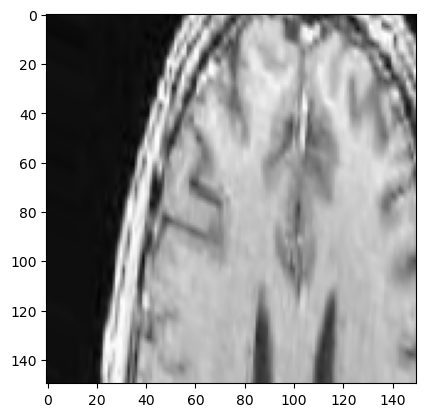

In [69]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][9])

In [70]:
predictions = []
predictions2 = []

for batch_data in train:
    preds = model.predict(batch_data)  #предсказание для текущего пакета
    predictions.append(preds)
    #проверка на конец
    if len(predictions) * train.batch_size >= train.samples:  
        break


for batch_data in train:
    preds2 = model.predict(batch_data)
    predictions2.append(preds2)
    #проверка на конец
    if len(predictions2) * train.batch_size >= train.samples:  
        break
#все предсказания в один массив
predictions = np.concatenate(predictions, axis=0)
predictions2 = np.concatenate(predictions2, axis=0)
filenames = train.filenames

#аравнение и перемещение несовпадающих изображений
for i in range(len(predictions)):
    pred1 = float(predictions[i])
    pred2 = float(predictions2[i])

    #абсолютный путь исходного файла
    original_path = os.path.join(source_dir, filenames[i])

    #анализ на .DS_Store или другие нежелательные файлы
    if not os.path.exists(original_path):
        continue

    #логика сравнения
    label1 = 1 if pred1 > 0.5 else 0
    label2 = 1 if pred2 > 0.5 else 0

    if label1 != label2:
        dest_path = os.path.join(target_dir, os.path.basename(filenames[i]))
        print(f'[НЕСОВПАЛО] {original_path} -> {dest_path}')
        try:
            shutil.move(original_path, dest_path)
        except Exception as e:
            print(f"Ошибка при копировании {original_path}: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━

/var/folders/fd/5v7fzl390p95y93xl7nxfjmm0000gn/T/ipykernel_20841/1770864902.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred1 = float(predictions[i])
/var/folders/fd/5v7fzl390p95y93xl7nxfjmm0000gn/T/ipykernel_20841/1770864902.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred2 = float(predictions2[i])
